### Part 1:Rule Based NLP and Regex:

In [63]:
import re
from nltk.corpus import stopwords
word_to_num = {"one": 1, "two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "seven": 7, "eight": 8, "nine": 9, "ten": 10}

def generate_bill(text):
    tokens = re.split(r'(?<!\d),(?! \d)|(?<!\d) and', text)
    result = []
    total_bill = 0  
    for token in tokens:
        token = ' '.join([str(word_to_num.get(word.strip().lower(), word.strip())) for word in token.split() if word.lower() not in ['bought', 'kilos', 'each', 'purchased']])
        stop_words = set(stopwords.words('english'))
        token = ' '.join([word for word in token.split() if word.lower() not in stop_words])
        result.append(token)

    print("Generated Bill:")
    print("{:<20} {:<10} {:<10} {:<10}".format("Product", "Quantity", "Unit Price", "Total Price"))

    for item in result:
        match = re.match(r'(\d+(?:,\d+)*(?:\.\d+)?) (.+?) (\d+(?:,\d+)*(?:\.\d+)?)', item)
        if match:
            quantity, product, unit_price = match.groups()
            quantity = float(quantity.replace(',', ''))  
            unit_price = float(unit_price.replace(',', ''))  
            total_price = quantity * unit_price
            total_bill += total_price
            print("{:<20} {:<10} {:<10} {:<10}".format(product, quantity, unit_price, total_price))
    print("Total Bill: {:.2f} $".format(total_bill))  

text = "I bought three Samsung smartphones 150 $ each, four kilos of fresh banana for 1,2 dollar a kilogram and one Hamburger with 4,5 dollar"
generate_bill(text)

Generated Bill:
Product              Quantity   Unit Price Total Price
Samsung smartphones  3.0        150.0      450.0     
fresh banana         4.0        12.0       48.0      
Hamburger            1.0        45.0       45.0      
Total Bill: 543.00 $


### Part 2: word Embedding :

#### retrieving the data from mongo DB

In [4]:
import pymongo

mongo_client = pymongo.MongoClient('mongodb://127.0.0.1:27017')

In [5]:
db = mongo_client['articles']
db_collection = db.sportArticles

In [8]:
articles =  [article['content']for article in db_collection.find({})]

['أعلن آياكس أمستردام الهولندي اليوم الثلاثاء، إيقاف أليكس كروس الرئيس التنفيذي الجديد، بشكل فوري، للاشتباه في تورطه بتداولات داخلية لأسهم النادي.وأكّد آياكس في بيان أنّ قرار إيقاف الرئيس التنفيذي جاء بعد أن علم مجلس الإدارة أن كروس اشترى أكثر من 17 ألف سهم في آياكس قبل أسبوع\xa0 من الإعلان عن تعيينه في 2 آب/أغسطس 2023.وكشف النادي أنّ الاستشارة القانونية التي أجراها أشارت إلى أنه من المحتمل أن يكون كروس متورطاً في تداول الأسهم من الداخل.وسيتولى أعضاء مجلس الإدارة واجبات ومسؤوليات الرئيس التنفيذي، كما سيقوم مايكل فان براغ (رئيس الاتحاد الهولندي السابق) بمساعدة مجلس الإدارة بشكل موقت.يُذكر أن آياكس يحتل المركز الخامس في ترتيب الدوري الهولندي لكرة القدم برصيد 44 نقطة، بفارق 28 نقطة عن آيندهوفن المُتصدر.\n\n',
 'قدّم روما اليوم الثلاثاء القميص الذي سيرتديه فريق كرة القدم السبت المقبل في مواجهة "ديربي العاصمة" أمام لاتسيو.واستوحي القميص من ذلك الذي ارتداه روما في ديربي موسم 1998-1999 الذي فاز به روما على لاتسيو بثلاثة أهداف لواحد.ويحتضن ملعب "الأولمبيكو" مباراة الديربي السبت المقبل، وهي أهم

#### tokenizing the data

In [95]:
from nltk.tokenize import word_tokenize
tokenized_articles = []

for article in articles:
    tokenized_articles.append(word_tokenize(article))
tokenized_articles[:10]

[['أعلن',
  'آياكس',
  'أمستردام',
  'الهولندي',
  'اليوم',
  'الثلاثاء،',
  'إيقاف',
  'أليكس',
  'كروس',
  'الرئيس',
  'التنفيذي',
  'الجديد،',
  'بشكل',
  'فوري،',
  'للاشتباه',
  'في',
  'تورطه',
  'بتداولات',
  'داخلية',
  'لأسهم',
  'النادي.وأكّد',
  'آياكس',
  'في',
  'بيان',
  'أنّ',
  'قرار',
  'إيقاف',
  'الرئيس',
  'التنفيذي',
  'جاء',
  'بعد',
  'أن',
  'علم',
  'مجلس',
  'الإدارة',
  'أن',
  'كروس',
  'اشترى',
  'أكثر',
  'من',
  '17',
  'ألف',
  'سهم',
  'في',
  'آياكس',
  'قبل',
  'أسبوع',
  'من',
  'الإعلان',
  'عن',
  'تعيينه',
  'في',
  '2',
  'آب/أغسطس',
  '2023.وكشف',
  'النادي',
  'أنّ',
  'الاستشارة',
  'القانونية',
  'التي',
  'أجراها',
  'أشارت',
  'إلى',
  'أنه',
  'من',
  'المحتمل',
  'أن',
  'يكون',
  'كروس',
  'متورطاً',
  'في',
  'تداول',
  'الأسهم',
  'من',
  'الداخل.وسيتولى',
  'أعضاء',
  'مجلس',
  'الإدارة',
  'واجبات',
  'ومسؤوليات',
  'الرئيس',
  'التنفيذي،',
  'كما',
  'سيقوم',
  'مايكل',
  'فان',
  'براغ',
  '(',
  'رئيس',
  'الاتحاد',
  'الهولندي',


#### removing stopwords and non meaningful charachters

In [96]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words("arabic"))
filtred_content = [word for article in tokenized_articles for word in article if not word in stopwords and not word.isdigit()]
print('before filtration: ',len([word for article in tokenized_articles for word in article]))
print('after filtration: ',len(filtred_content))


before filtration:  1215
after filtration:  980


In [97]:
import re
pattern = re.compile(r'\d')
digit_words = [word.string for w in filtred_content for word in pattern.finditer(w)]
ls = ['(', '،', ')', '.', '/', ':', '؟', 'ب', '`', 'ل', "'", '؛','``',"''"] 
filtred_content2 = [word for word in filtred_content if not word in digit_words and not word in ls]
print('before filtration: ',len(filtred_content))
print('after filtration: ',len(filtred_content2))

before filtration:  980
after filtration:  867


#### one hot encoding the data using pandas get_dummies method

In [26]:
import pandas as pd
one_hot_encoded_data = pd.get_dummies(filtred_content2)
one_hot_encoded_data

,-,.أنهى,.بادر,.وأشارت,.وأصيب,.وأضاف,.وتابع,.ورفع,.وطرح,.وكان,...,يحتل,يحق,يخالف,يريدون,يستضيف,يعرض,يغير,يفيد,يكون,يوم
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
863,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
864,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
865,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### word2count 

In [94]:
word2count = {}
for word in filtred_content2:
    if word not in word2count.keys():
        word2count[word] = 1
    else:
        word2count[word] += 1
{k:word2count[k] for k in list(word2count)[:10]}

{'أعلن': 4,
 'آياكس': 4,
 'أمستردام': 1,
 'الهولندي': 3,
 'اليوم': 10,
 'الثلاثاء،': 2,
 'إيقاف': 2,
 'أليكس': 1,
 'كروس': 3,
 'الرئيس': 3}

#### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
result = tfidf.fit_transform(filtred_content2)
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
    print(ele1, ':', ele2)
print('\nWord indexes:')
print(tfidf.vocabulary_)
print('\ntf-idf value:')
print(result)
print('\ntf-idf values in matrix form:')
print(result.toarray())

#### Appliying Word2Vec CBOW model using Gensim and FastText
**ArWordVec** is a set of pre-trained word embedding models derived from Arabic tweets. It aims to support Arabic NLP research. Various techniques were used to build these models, including word2vec and GloVe. Models are named in the format 'model-d-w-m', such as CBOW-500-5-400-10, indicating the approach, vector size, window size, and minimum word count, respectively.

to download the model visit this [link](https://github.com/mmdoha200/ArWordVec)

for the fasttext model it was trained on Common Crawl and Wikipedia using fastText. These models were trained using CBOW with position-weights, in dimension 300, with character n-grams of length 5, a window of size 5 and 10 negatives.
to download the model visit this [link](https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ar.300.bin.gz)

In [65]:
from gensim.models import Word2Vec
model_cbow = Word2Vec.load(r'C:\Users\ACER\OneDrive\Documents\MST\S2\NLP\w2v_CBOW_500_5_400_10.model')

In [68]:
import fasttext
model_fasttext = fasttext.load_model(r'C:\Users\ACER\OneDrive\Documents\MST\S2\NLP\fasttext arabic\cc.ar.300.bin')

In [42]:
def get_max_value_pair(pair_list):

  if not pair_list:
    return None 

  max_pair = pair_list[0]
  for pair in pair_list:
    if pair[1] > max_pair[1]:
      max_pair = pair

  return max_pair

In [93]:
most_sim = {}
for word in filtred_content2:
    if word in model_cbow.wv:
        most_sim[word] = get_max_value_pair(model_cbow.wv.most_similar(word))
    else:
        most_sim[word] = None
{k:most_sim[k] for k in list(most_sim)[:10]}

{'أعلن': None,
 'آياكس': None,
 'أمستردام': None,
 'الهولندي': ('البرتغالي', 0.5640104413032532),
 'اليوم': ('لليوم', 0.5962443947792053),
 'الثلاثاء،': None,
 'إيقاف': None,
 'أليكس': None,
 'كروس': ('مودريتش', 0.597771167755127),
 'الرئيس': None}

In [69]:
vectorized_words_cbow={}
vectorized_words_ft={}
for word in filtred_content2:
    try:
        vectorized_words_cbow[word]=model.wv[word]
        vectorized_words_ft[word] = model_fasttext.get_word_vector(word)
    except:
        continue


In [70]:
from sklearn.manifold import TSNE
import  numpy as np
tsne = TSNE(n_components=2,perplexity=2,random_state=0)

In [71]:
reduced_cbow = tsne.fit_transform(np.array([vec.tolist() for vec in vectorized_words_cbow.values()]))
reduced_ft = tsne.fit_transform(np.array([vec.tolist() for vec in vectorized_words_ft.values()]))
words = [word for word in vectorized_words_cbow.keys()]

C:\Users\ACER\PycharmProjects\LogisticRegression\env\python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


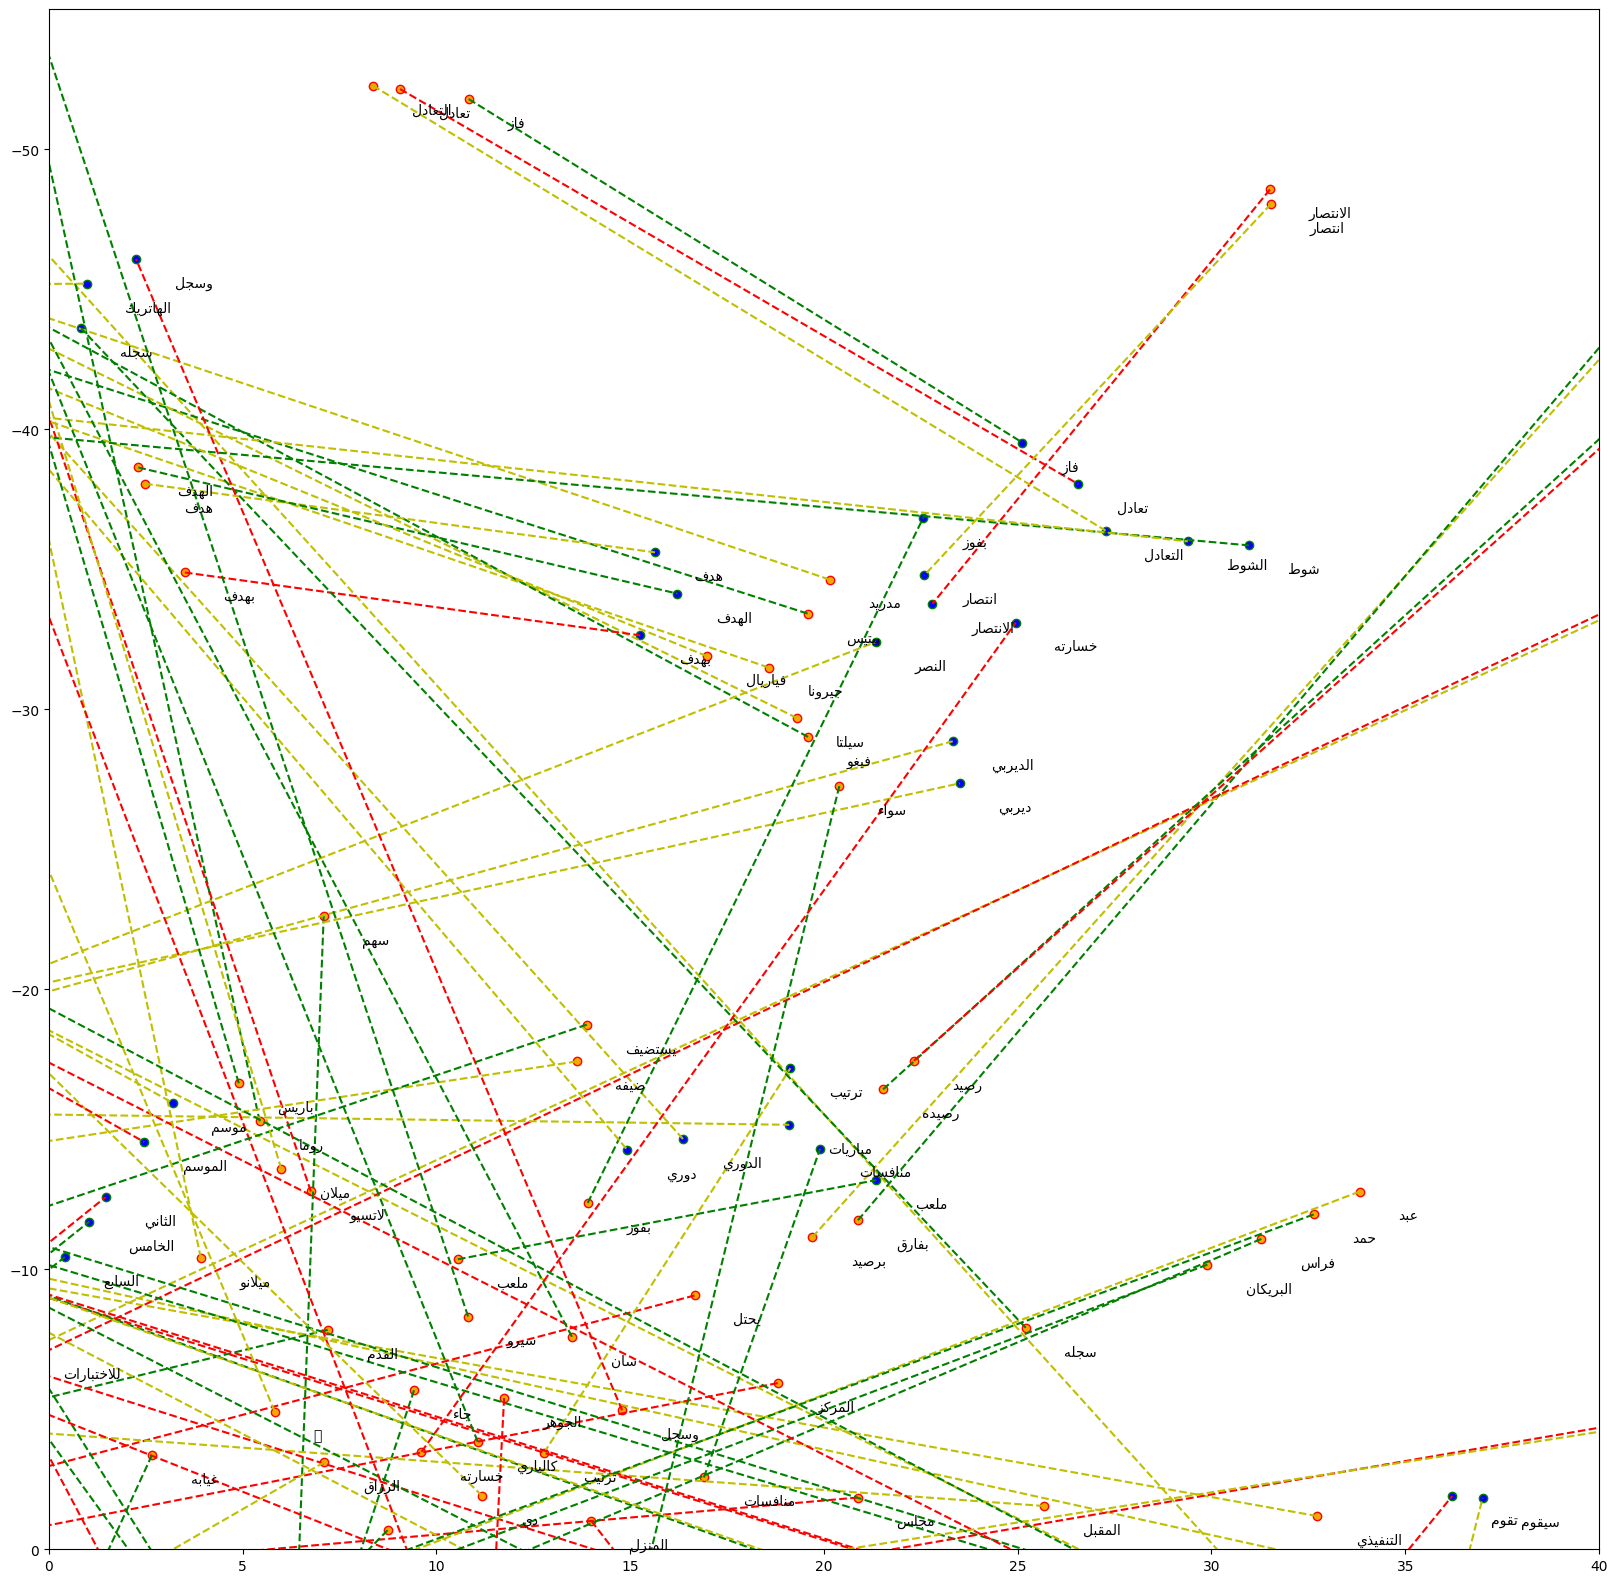

In [90]:
import matplotlib.pyplot as plt
import random
import arabic_reshaper
from bidi.algorithm import get_display

plt.figure(figsize=(20, 20))
plt.scatter(reduced_cbow[:, 0], reduced_cbow[:, 1], c='orange', edgecolors='r')
plt.scatter(reduced_ft[:, 0], reduced_ft[:, 1], c='blue', edgecolors='g')
for label, x_cbow, y_cbow, x_ft, y_ft in zip(words, reduced_cbow[:, 0], reduced_cbow[:, 1], reduced_ft[:, 0], reduced_ft[:, 1]):
    label_ = get_display( arabic_reshaper.reshape(label))
    plt.annotate(label_, xy=(x_cbow+1, y_cbow+1), xytext=(0, 0), textcoords='offset points')
    plt.annotate(label_, xy=(x_ft+1, y_ft+1), xytext=(0, 0), textcoords='offset points')
    plt.plot([x_cbow, x_ft], [y_cbow, y_ft], random.choice(['y--','r--','g--'])) 

xmin, xmax = 0,40
ymin, ymax = 0, -55
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.show()

##### NB: you can change the xmin, xmax, ymin and ymax for zooming on a specific area, remove if no zoom is required

### Conclusion:
##### Based on the plot, it appears that the word embeddings from the CBOW and FastText models for the same words are distinctly different. The lines connecting the same word in both models indicate a significant shift in the vector space. This suggests that each model captures different semantic and syntactic aspects of the words. 